In [1]:
from nrclex import NRCLex

In [2]:
import itertools

In [3]:
import pandas as pd

In [4]:
%store -r all_tweets

In [7]:
all_tweets.head()

,index,date,tweet,language,user_id_str,username,docs,lemmatization,s_token,token,vader_tweets,sentiment
0,0.0,2020-10-24,chikooslim i was thinking that since it was t...,en,18491914,slattfri,"( , chikooslim, i, was, thinking, that, since,...",chikooslim I be think that since it be the d...,"[chikooslim, I, be, think, that, since, it, be...","[chikooslim, I, think, since, daughter, refuse...",chikooslim I think since daughter refuse I ima...,Negative
1,1.0,2020-10-24,he s been saying that for four years alllies...,en,46384399,francesmiddlet2,"(he, s, been, saying, that, for, four, years, ...",he s be say that for four year alllie tru...,"[he, s, be, say, that, for, four, year, alllie...","[say, four, year, alllie, trumplie, time, narc...",say four year alllie trumplie time narcissist ...,Neutral
2,2.0,2020-10-24,incredibly thought provoking article make sur...,en,2902130034,mfly1971,"(incredibly, thought, provoking, article, , m...",incredibly think provoke article make sure y...,"[incredibly, think, provoke, article, make, su...","[incredibly, think, provoke, article, make, su...",incredibly think provoke article make sure rea...,Neutral
3,3.0,2020-10-24,diadexxus tugrik it was but that s not sayi...,en,15608869,Ryu_Raccoon,"( , diadexxus, , tugrik, it, was, , but, tha...",diadexxus tugrik it be but that s not sa...,"[diadexxus, tugrik, it, be, but, that, s, not,...","[diadexxus, tugrik, say, much, hard, get, bad,...",diadexxus tugrik say much hard get bad first o...,Negative
4,4.0,2020-10-24,don lemon meltdown over black trump support ...,en,1216233063115395072,MackmanAce,"(don, lemon, meltdown, over, black, trump, sup...",don lemon meltdown over black trump support ...,"[don, lemon, meltdown, over, black, trump, sup...","[lemon, meltdown, black, trump, support, via, ...",lemon meltdown black trump support via youtube...,Neutral


In [8]:
NRC = all_tweets[['token','vader_tweets']]

In [9]:
#find out the top emotions list
NRC['NRC sentiment'] = NRC['vader_tweets'].apply(lambda x: NRCLex(x).top_emotions)

/var/folders/qm/j2nyw_6j7272_3cq86kpw75r0000gn/T/ipykernel_21314/2566031846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NRC['NRC sentiment'] = NRC['vader_tweets'].apply(lambda x: NRCLex(x).top_emotions)


In [10]:
#return the first emotion in the top emotion list
def ComputeSentiment(l):
    for item in l:
        return item[0]

In [11]:
NRC['top sentiment'] = NRC['NRC sentiment'].apply(lambda x:ComputeSentiment(x))

/var/folders/qm/j2nyw_6j7272_3cq86kpw75r0000gn/T/ipykernel_21314/3200716878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NRC['top sentiment'] = NRC['NRC sentiment'].apply(lambda x:ComputeSentiment(x))


In [12]:
final_nrc = NRC.dropna()

In [13]:
final_nrc.reset_index(inplace=True)
final_nrc.drop(columns=['index'],inplace=True)
final_nrc.head()

,token,vader_tweets,NRC sentiment,top sentiment
0,"[chikooslim, I, think, since, daughter, refuse...",chikooslim I think since daughter refuse I ima...,"[(negative, 0.23076923076923078)]",negative
1,"[say, four, year, alllie, trumplie, time, narc...",say four year alllie trumplie time narcissist ...,"[(negative, 0.25), (sadness, 0.25)]",negative
2,"[incredibly, think, provoke, article, make, su...",incredibly think provoke article make sure rea...,"[(trust, 0.2), (surprise, 0.2), (positive, 0.2...",trust
3,"[diadexxus, tugrik, say, much, hard, get, bad,...",diadexxus tugrik say much hard get bad first o...,"[(anger, 0.23529411764705882), (negative, 0.23...",anger
4,"[lemon, meltdown, black, trump, support, via, ...",lemon meltdown black trump support via youtube...,"[(negative, 0.42857142857142855)]",negative


In [14]:
%store final_nrc

Stored 'final_nrc' (DataFrame)


In [15]:
%store NRC

Stored 'NRC' (DataFrame)


In [16]:
len(final_nrc)

51915

In [17]:
#count the sentiments
final_nrc['count']  = 1

In [18]:
nrc_vis = final_nrc.groupby('top sentiment').sum()

In [19]:
nrc_vis

,count
top sentiment,
anger,3941
anticipation,1997
disgust,48
fear,9613
joy,5
negative,7028
positive,9158
sadness,157
surprise,8835


In [20]:
#check the sentiment types in NRC Lexicon
list(nrc_vis.index)

['anger',
 'anticipation',
 'disgust',
 'fear',
 'joy',
 'negative',
 'positive',
 'sadness',
 'surprise',
 'trust']

In [21]:
import numpy as np
import matplotlib.pyplot as plt

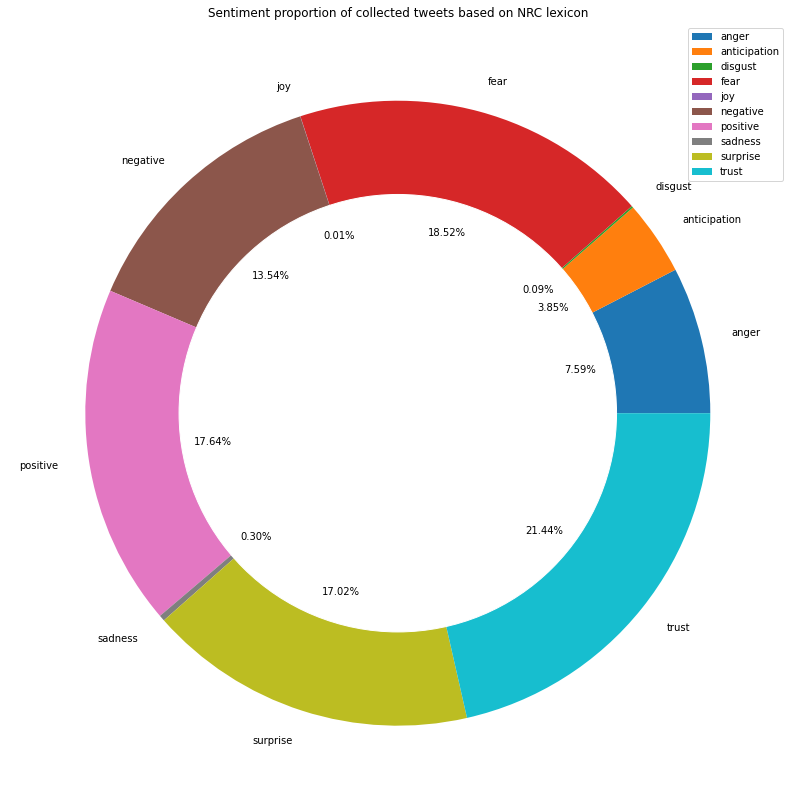

In [23]:
#visualization
data = np.array(list(nrc_vis['count']))
label = list(nrc_vis.index)
plt.figure(figsize=(14,15))
plt.pie(data, labels = label,autopct='%1.2f%%')
circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.legend(loc = 'best')
#plt.show()
plt.title('Sentiment proportion of collected tweets based on NRC lexicon')
plt.savefig('plots/NRC sentiment proportion.jpg')

In [24]:
%store nrc_vis

Stored 'nrc_vis' (DataFrame)
